## Markup syntax

## Libraties and data source

In [185]:
# import libraries
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import time as tm

# plotting
import matplotlib.pyplot as plt

## Data Frame Basic

In [192]:
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df = pd.read_csv(dataDir + "zigbee2.csv", parse_dates = True)

df.tail()


,Timestamp,ch0_zigbee1,ch1_zigbee1
5493428,1518799504,791.195750,245.714292
5493429,1518799505,792.924955,239.214292
5493430,1518799506,802.995027,225.071435
5493431,1518799507,794.179475,234.000007
5493432,1518799508,788.008589,236.214292


## Data Frame extension & transformation

In [220]:
# Loading basic dataframe as df
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df = pd.read_csv(dataDir + r"zigbee2.csv")

#convert epoch time to datetime
df.index = pd.to_datetime(df['Timestamp'], unit='s')
df.index.day

#Add a new derivative column (Power)
df['PW'] = df['ch0_zigbee2'] * df['ch1_zigbee2']

#rename columns
df.rename(columns={'ch0_zigbee2': 'voltage', 'ch1_zigbee2': 'current'}, inplace=True)

#Adding Time tags
df['month'] = df.index.month
df['day'] = df.index.dayofweek
df['hour'] = df.index.hour
df['min'] = df.index.minute
df['sec'] = df.index.second

df.head()
#df



,Timestamp,voltage,current,PW,month,day,hour,min,sec
Timestamp,,,,,,,,,
2017-11-27 07:07:54,1511766474,243.444846,1360.571437,331224.103559,11,0,7,7,54
2017-11-27 07:07:55,1511766475,254.294755,1375.785722,349855.093698,11,0,7,7,55
2017-11-27 07:07:56,1511766476,224.864376,1346.857151,302860.192279,11,0,7,7,56
2017-11-27 07:07:57,1511766477,208.657323,1334.500008,278453.199449,11,0,7,7,57
2017-11-27 07:07:58,1511766478,179.091320,1304.357151,233599.043318,11,0,7,7,58


In [178]:
df.describe()

,Timestamp,voltage,current,PW,month,day,hour,min,sec
count,1.048575e+06,1.030047e+06,1.020876e+06,1.002348e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.512439e+09,1.300578e+02,7.788243e+02,1.216707e+05,1.174660e+01,2.618221e+00,1.128166e+01,2.947493e+01,2.950556e+01
std,3.862364e+05,7.408751e+01,5.558153e+02,1.246741e+05,4.349577e-01,1.988292e+00,6.855247e+00,1.722871e+01,1.731451e+01
min,1.511766e+09,-4.645118e+02,-1.373571e+02,-4.229416e+05,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.512083e+09,7.235533e+01,1.826429e+02,1.683791e+04,1.100000e+01,1.000000e+00,5.000000e+00,1.500000e+01,1.500000e+01
50%,1.512472e+09,1.209087e+02,8.208572e+02,7.743931e+04,1.200000e+01,2.000000e+00,1.100000e+01,2.900000e+01,3.000000e+01
75%,1.512767e+09,1.777690e+02,1.303143e+03,1.881504e+05,1.200000e+01,4.000000e+00,1.700000e+01,4.400000e+01,4.400000e+01
max,1.513082e+09,5.824367e+02,1.929571e+03,9.964686e+05,1.200000e+01,6.000000e+00,2.300000e+01,5.900000e+01,5.900000e+01


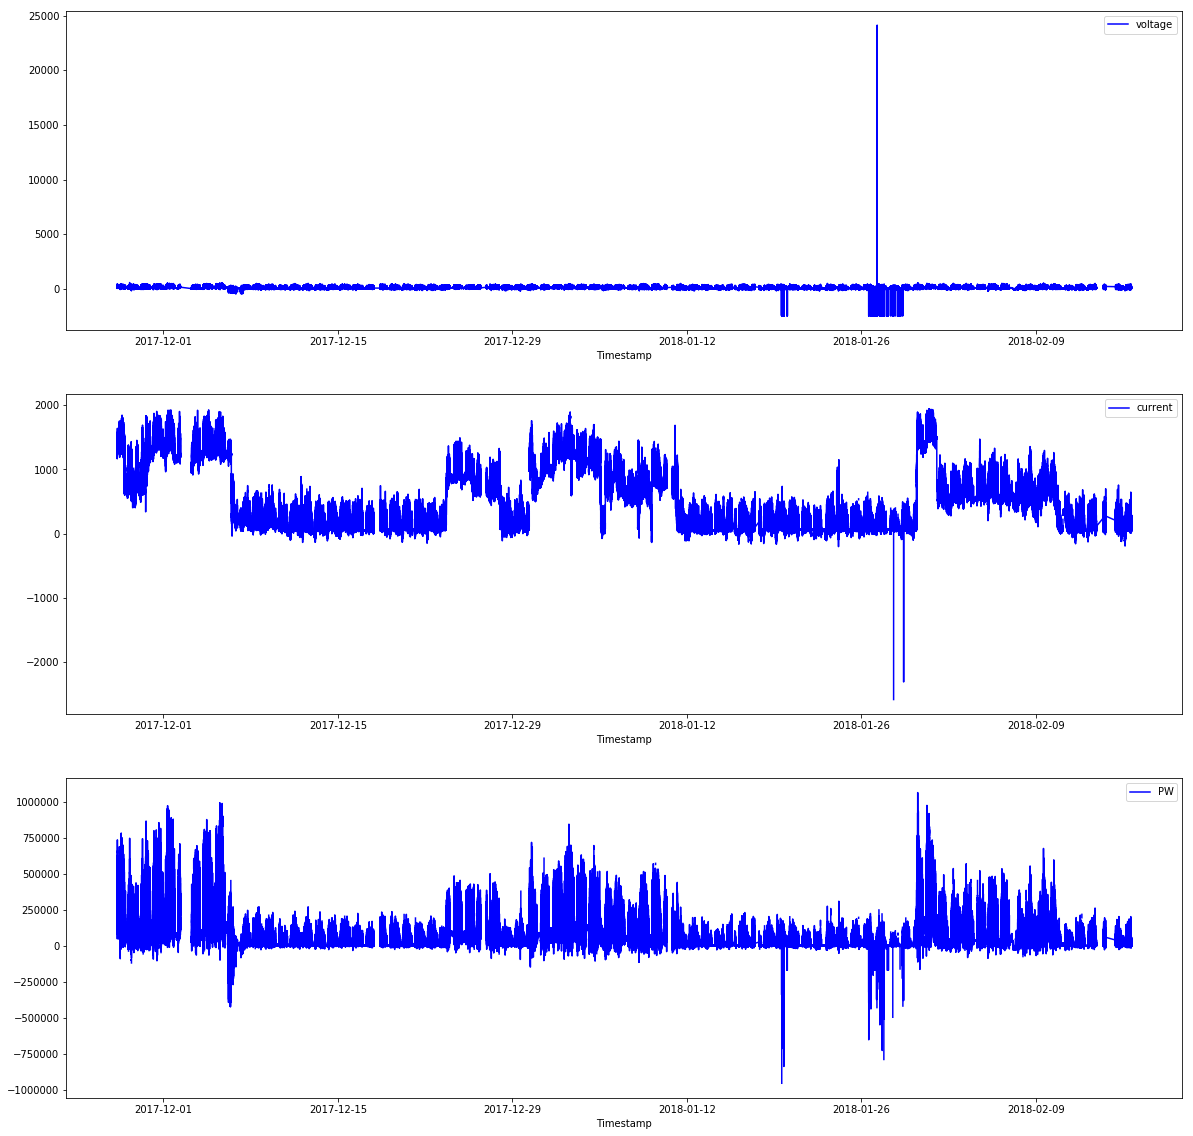

In [223]:
_ = df[["voltage","current", 'PW']].plot(subplots=True, layout=(3,1), style=['b','b','b'], figsize=(20,20), x_compat=True, sharex=False)     

#plot a section
#_ = df[["voltage","current", 'PW']]["2018-01-20":"2018-01-30"].plot(subplots=True, layout=(3,1), style=['b','b','b'], figsize=(20,20), x_compat=True, sharex=False)     



## Data auditing

In [168]:
        #Missing values
num_row = len(df.index)
num_row
df.isnull().sum()

        #Missing values in relative values
#df.isnull().sum()/num_row*100  # relative in %

Timestamp        0
voltage      18528
current      27699
PW           46227
month            0
day              0
hour             0
min              0
sec              0
dtype: int64

## transforming dataframe

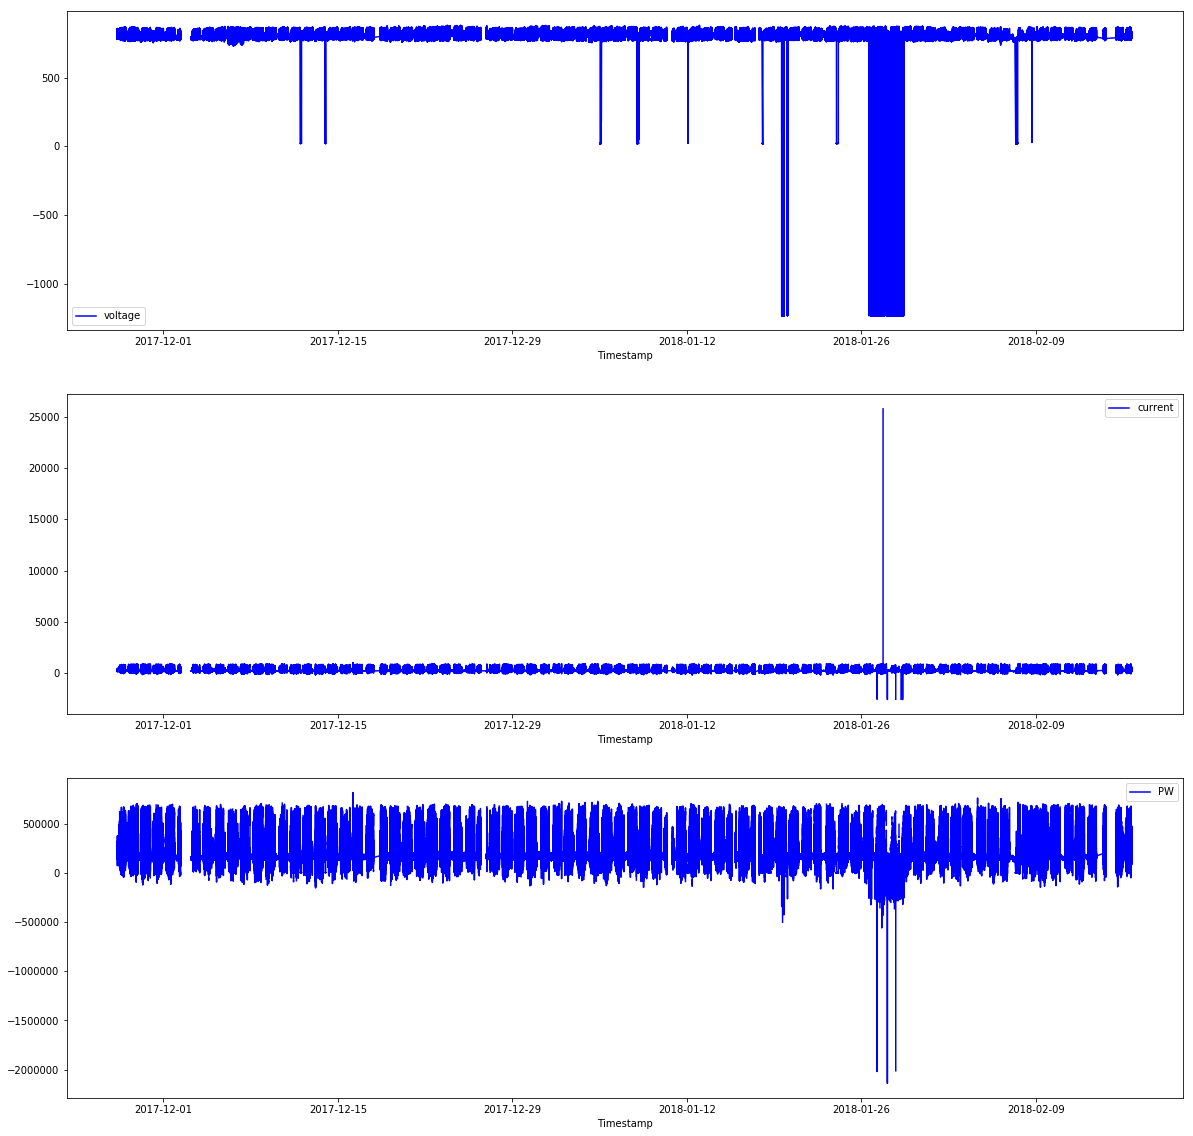

In [208]:
                #Daily diagrams: Voltage, current, Power

            # a - Working Days; weekday = 1-5
a = df[df.index.weekday<7] # vzame samo delovne dni
#a = a["2017-01-24":"2017-01-24"] # vzame meritve samo do 2017-12-03
        #plot
_ = a[["voltage","current", 'PW']].plot(subplots=True, layout=(3,1), style=['b','b','b'], figsize=(20,20), x_compat=True, sharex=False)     
#a.describe()

# transforming dataframe

            # b - Saturdays; weekday = 6
#b = df[df.index.weekday==6]
    #_ = b[["voltage","current", 'PW']].plot(subplots=True, layout=(3,1), style=['b','b','b'], figsize=(20,20), x_compat=True, sharex=False)     
    #b = b[(b.index <= '2017-12-03')] # vzame meritve samo do 2017-12-03
            #plot
    #_ = b[["voltage","current", 'PW']].plot(subplots=True, layout=(3,1), style=['b','b','b'], figsize=(20,20), x_compat=True, sharex=False)     



            # c - Sundays; weekday = 0
#c = df[df.index.weekday==0]
#c = c[(c.index > '2017-12-11') & (c.index <= '2017-12-12')]   ##pobere samo eno nedeljo
    #c = c[(c.index > '2017-11-26') & (c.index <= '2017-11-28') + (c.index > '2017-12-11') & (c.index <= '2017-12-12')] ## pobere samo dve nedelji
        #plot
    #_ = c[["voltage","current", 'PW']].plot(subplots=True, layout=(3,1), style=['b','b','b'], figsize=(20,20), x_compat=True, sharex=False)     



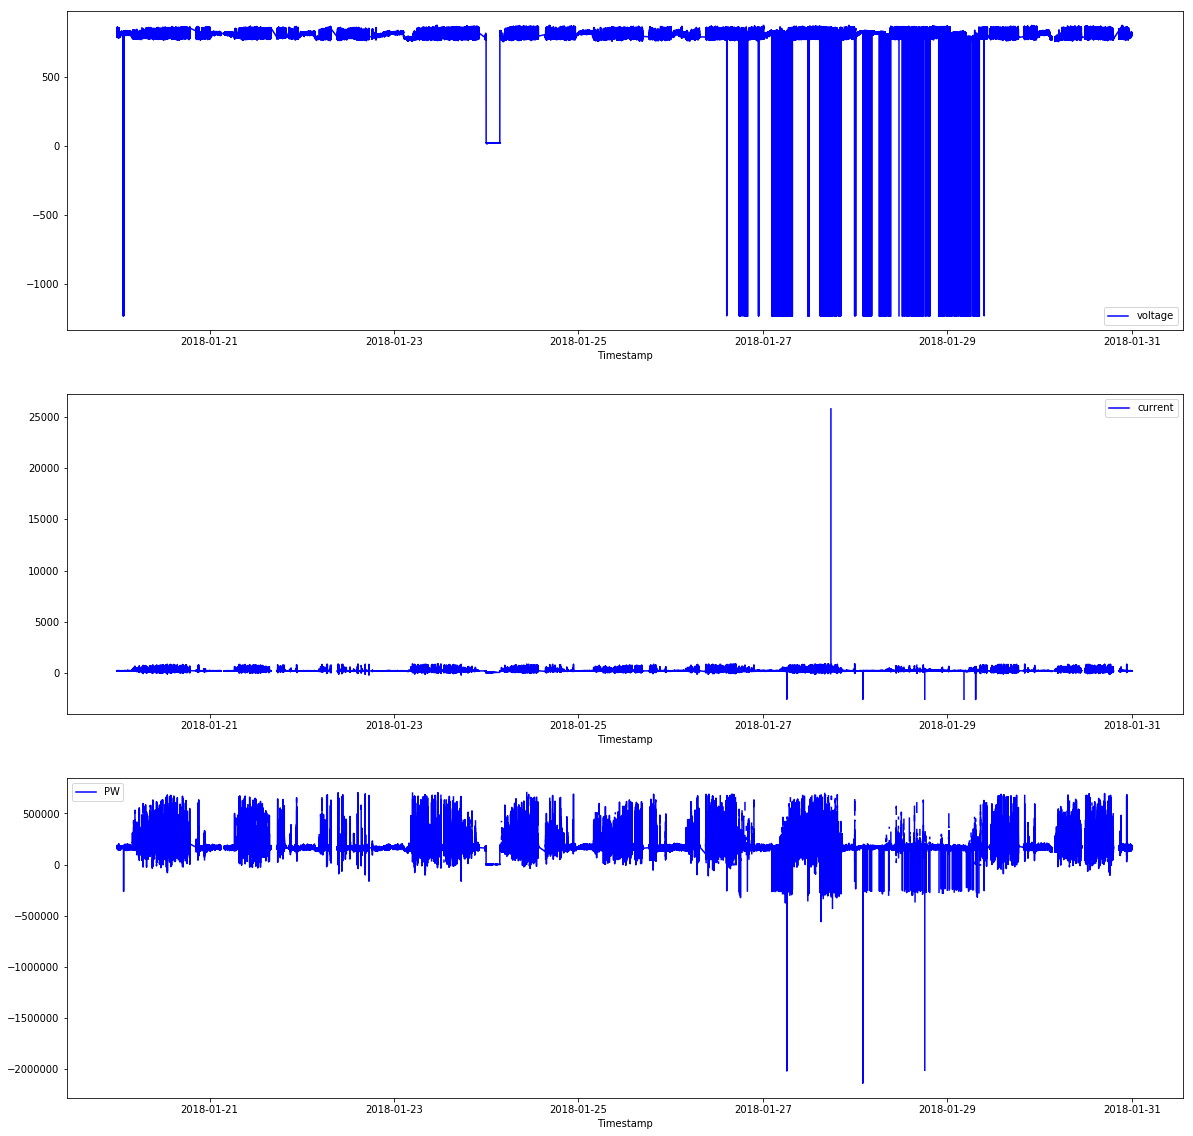

In [232]:
#a[["voltage","current", 'PW']]["2017-12-24":"2018-01-24"]

#plot
_ = a[["voltage","current", 'PW']]["2018-01-20":"2018-01-30"].plot(subplots=True, layout=(3,1), style=['b','b','b'], figsize=(20,20), x_compat=True, sharex=False)     


In [ ]:
 #daily diagrams analysis


    
    
    
    

## Seasonalities decomposition

In [179]:
#Replace missing valiues with =
a_temp = a.fillna(0)

# inport seasonal library
from statsmodels.tsa.seasonal import seasonal_decompose

#select one time series
v = a_temp[Df_temp.columns[2]]
v
#Additive model
#results = seasonal_decompose(v, model='additive')

#Multiplicative model




Timestamp
2017-11-27 07:07:54    1360.571437
2017-11-27 07:07:55    1375.785722
2017-11-27 07:07:56    1346.857151
2017-11-27 07:07:57    1334.500008
2017-11-27 07:07:58    1304.357151
2017-11-27 07:07:59    1282.285722
2017-11-27 07:08:00    1298.785722
2017-11-27 07:08:01    1313.142865
2017-11-27 07:08:02    1326.500008
2017-11-27 07:08:03    1290.571437
2017-11-27 07:08:04    1279.642865
2017-11-27 07:08:05    1284.142865
2017-11-27 07:08:06    1281.714294
2017-11-27 07:08:07    1274.142865
2017-11-27 07:08:08    1252.142865
2017-11-27 07:08:09    1271.571437
2017-11-27 07:08:10    1280.071437
2017-11-27 07:08:11    1313.142865
2017-11-27 07:08:12    1336.357151
2017-11-27 07:08:13    1341.214294
2017-11-27 07:08:14    1368.928580
2017-11-27 07:08:15    1379.071437
2017-11-27 07:08:16    1413.142865
2017-11-27 07:08:17    1432.071437
2017-11-27 07:08:18    1446.142865
2017-11-27 07:08:19    1466.214294
2017-11-27 07:08:20    1474.500008
2017-11-27 07:08:21    1476.071437
2017-11-27

In [181]:
#Additive model
#results = seasonal_decompose(v, model='additive')

#Multiplicative model

## voltage overview

In [79]:
#df.isnull("voltage").sum()
#dates.DayLocator()

In [31]:
#hourly data

week_data = df.pivot_table(index=df.index.day, columns= df.index.hour, values=["voltage"])
week_data.head()
#days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#ax = week_data.plot(figsize=(8,5))
#ax.legend(labels=days)

#_ = week_data[["Timestamp"]].plot(figsize=(20,20), x_compat=True, sharex=False)  


voltage                                                 \
Timestamp          0           1           2          3           4    
Timestamp                                                              
1           63.849979   50.455743   50.212443  51.894449  118.823288   
2                 NaN   54.921848   49.645994  50.462096  108.546476   
3                 NaN         NaN         NaN        NaN         NaN   
4           65.973988   62.176336   75.896540  71.111705  116.019250   
5          122.999267  118.965183  100.543344  95.062809  127.447502   

                                                                       \
Timestamp          5           6           7           8           9    
Timestamp                                                               
1          182.802638  235.934498  229.215626  231.826198  239.159445   
2          161.054076  182.875655  175.101230  175.011822  166.662950   
3           38.570670   76.246592  120.750678  144.584390  129.554037   
4          184.636776  226.747214  207.445648  194.188398  225.274658   
5          181.831106  221.109215         NaN  210.521095  217.760132   

              ...                                                      \
Timestamp     ...              14          15          16          17   
Timestamp     ...                                                       
1             ...      207.305281  205.974582  225.846017  219.169023   
2             ...             NaN         NaN         NaN         NaN   
3             ...      169.978083  162.337583  166.634032  154.675405   
4             ...      199.702953  205.509953  195.354057  208.875070   
5             ...      189.855500  190.863812  230.869419  225.354529   

                                                                       \
Timestamp          18          19          20          21          22   
Timestamp                                                               
1          222.582419  161.619383  135.746975  141.450905         NaN   
2                 NaN         NaN         NaN         NaN         NaN   
3          168.311026  126.410520  132.877069  137.768324   98.165985   
4          218.852497  163.469253  147.788868  135.902348  117.330859   
5          210.758582  157.013068  146.471490  146.418194  124.041985   

                       
Timestamp          23  
Timestamp              
1                 NaN  
2                 NaN  
3           61.692728  
4          107.242849  
5           95.850374  

[5 rows x 24 columns]

## Plots

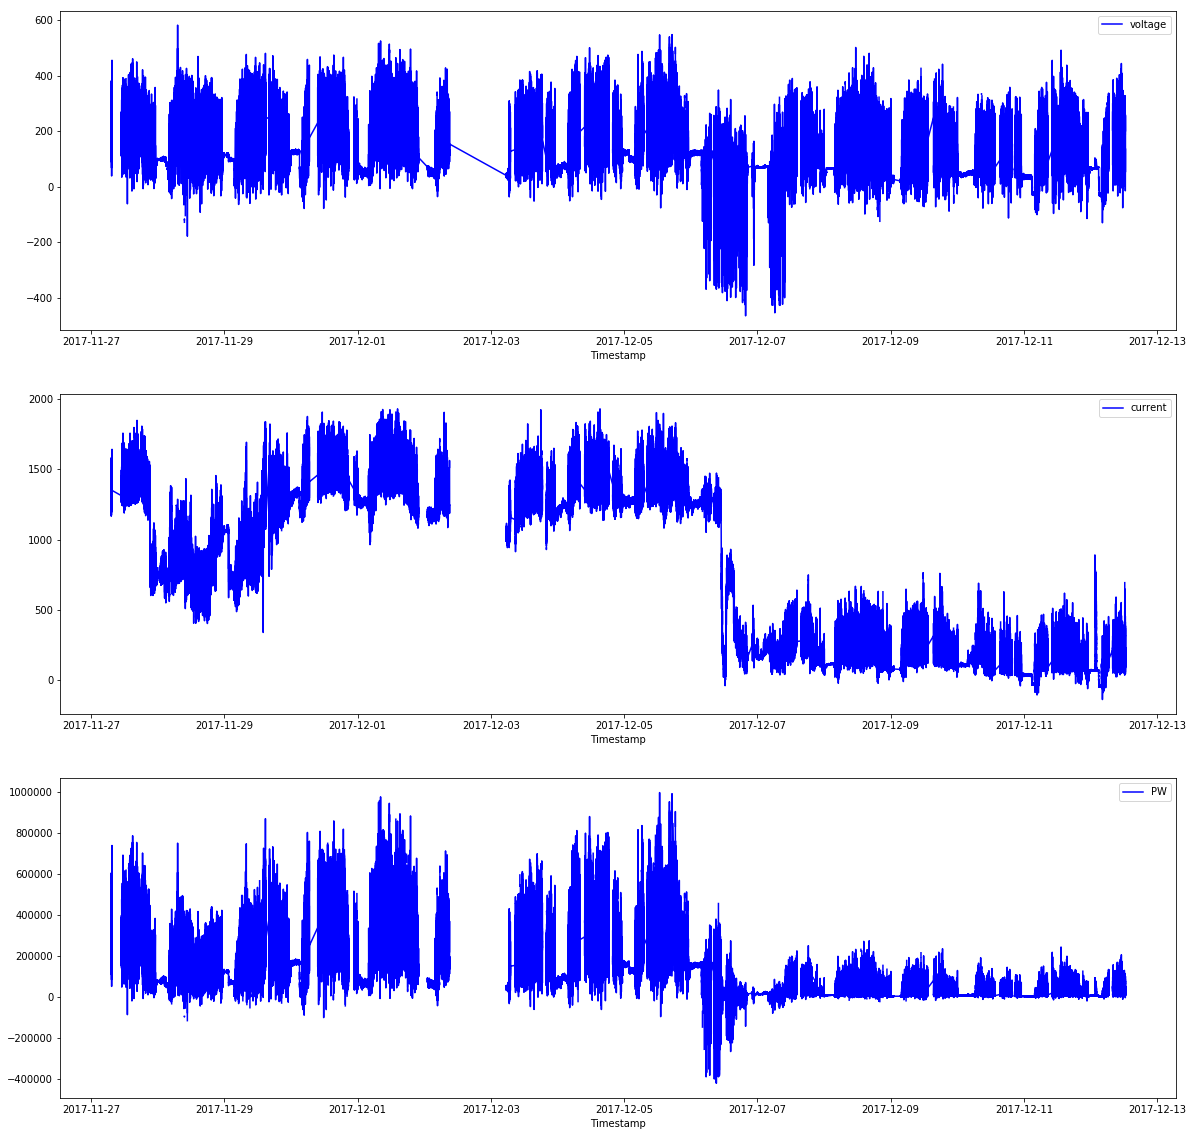

In [98]:
_ = df[["voltage","current", 'PW']].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False)     

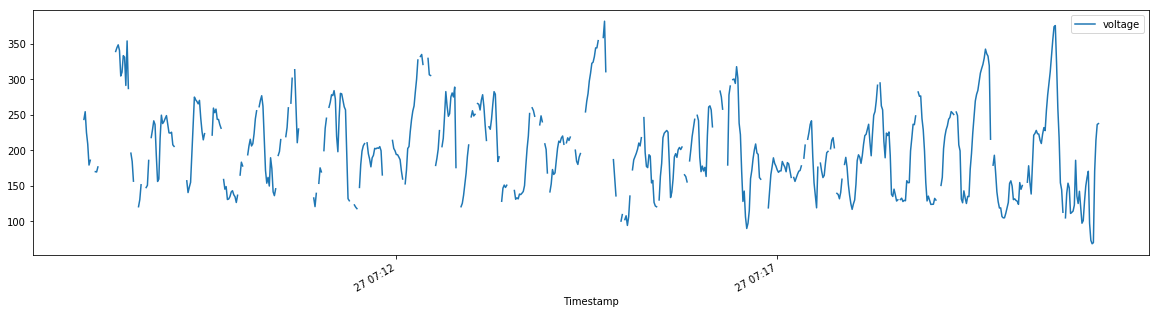

In [89]:
#hourly chart
a = 0
b = 0 + 800
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

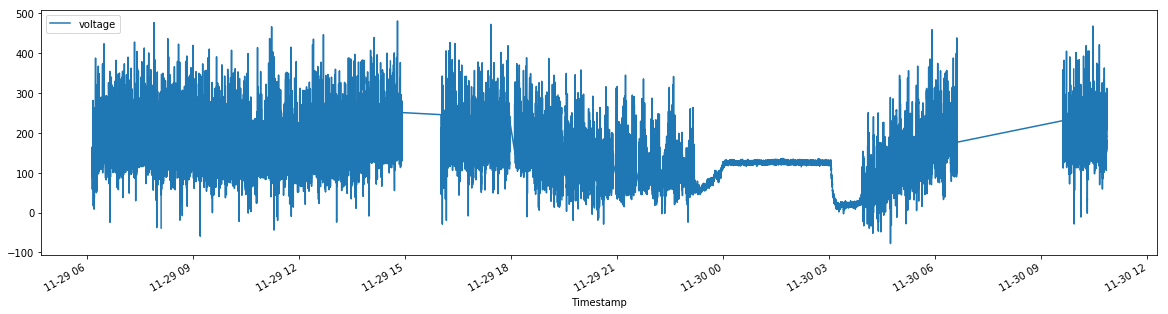

In [99]:
#daily chart
a = 140000
b = a + 86400
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

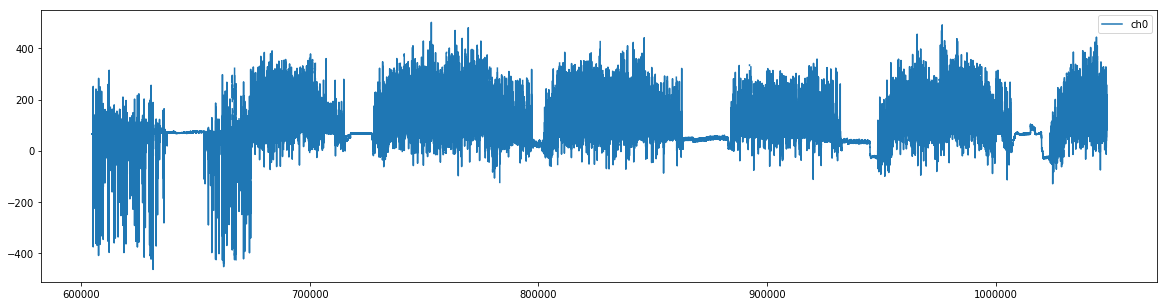

In [133]:
#weekly chart
a = 604800
b = a + 604800
df[a:b][["ch0"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

In [100]:
#df['dayofweek'] = df['dayoftime'].dt.day
#df



In [101]:
df.index

DatetimeIndex(['2017-11-27 07:07:54', '2017-11-27 07:07:55',
               '2017-11-27 07:07:56', '2017-11-27 07:07:57',
               '2017-11-27 07:07:58', '2017-11-27 07:07:59',
               '2017-11-27 07:08:00', '2017-11-27 07:08:01',
               '2017-11-27 07:08:02', '2017-11-27 07:08:03',
               ...
               '2017-12-12 12:34:23', '2017-12-12 12:34:24',
               '2017-12-12 12:34:25', '2017-12-12 12:34:26',
               '2017-12-12 12:34:27', '2017-12-12 12:34:28',
               '2017-12-12 12:34:29', '2017-12-12 12:34:30',
               '2017-12-12 12:34:31', '2017-12-12 12:34:32'],
              dtype='datetime64[ns]', name='Timestamp', length=1048575, freq=None)

## Exploratory data analysis

## Feature engineering


In [ ]:
# Tranformacija med podatki in vektorjem za model feeding-
# Feature evaluation


## Model  training 